In [44]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
from wordcloud import WordCloud

In [2]:
for data_ in pd.read_csv('data/Eluvio_DS_Challenge.csv', chunksize=300000):
    break
    
data_.drop_duplicates(inplace=True)

In [3]:
data_.drop(columns=['category', 'down_votes'], axis=1, inplace=True)

In [4]:
data_.head()

,time_created,date_created,up_votes,title,over_18,author
0,1201232046,2008-01-25,3,Scores killed in Pakistan clashes,False,polar
1,1201232075,2008-01-25,2,Japan resumes refuelling mission,False,polar
2,1201232523,2008-01-25,3,US presses Egypt on Gaza border,False,polar
3,1201233290,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420
4,1201274720,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans


In [5]:
len(data_)

299994

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa6c027beb8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa6be134b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa6c027bd68>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa6be1487b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa6be148d68>],
 'means': []}

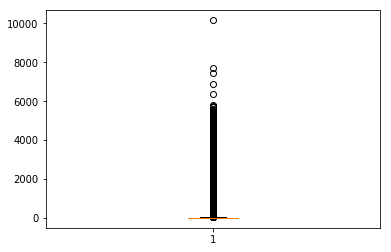

In [6]:
# Boxplot for up_votes
plt.boxplot(data_.up_votes)

In [13]:
data_.title = data_.title.apply(lambda _: _.translate(str.maketrans('', '', string.punctuation)).strip().lower())

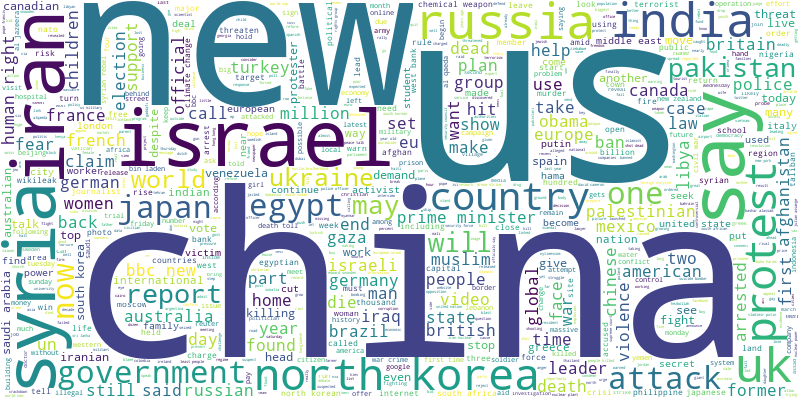

In [21]:
# Analysis of dominant words
corpus = ','.join(list(data_.title.values))
wc = WordCloud(background_color="white", max_words=5000, width=800, height=400, contour_width=3, contour_color='blue')
wc.generate(corpus)
wc.to_image()

In [58]:
def get_decilewise_performance(data, column):
    data[column+'_bins'] = pd.qcut(data[column], 10, duplicates='drop').astype('str')
    df_size = data.groupby(by=column+'_bins').size().reset_index(name='total_news')
    df_grouped = data.groupby(by=column+'_bins').is_popular.sum().reset_index(name='popular_news')
    df_grouped = df_grouped.merge(df_size, on=column+'_bins', how='inner')
    df_grouped['popular_news_%'] = round(df_grouped.popular_news/df_grouped.popular_news.sum(), 4)*100
    df_grouped.sort_values(by=column+'_bins', ascending=False, inplace=True)
    
    return df_grouped
    

In [64]:
confusion_matrix(df_train.is_popular, df_train.is_popular_predicted)

array([[173651,   3681],
       [ 24414,   8145]])

In [63]:
confusion_matrix(df_test.is_popular, df_test.is_popular_predicted)

array([[73616,  2383],
       [13517,   437]])

In [55]:
# Accuracy on Training data
accuracy_score(df_train.is_popular, df_train.is_popular_predicted)

0.8661448084958383

In [61]:
# Accuracy on Testing data
accuracy_score(df_test.is_popular, df_test.is_popular_predicted)

0.823241025869065

In [72]:
f1_score(df_train.is_popular, df_train.is_popular_predicted)

0.3670158837445083

In [73]:
f1_score(df_test.is_popular, df_test.is_popular_predicted)

0.05210444735900799

In [67]:
df_test.is_popular.sum()

13954.0

In [69]:
8145/df_train.is_popular.sum()

0.25016124573850546